# Capstone - Roundhouse Data Cleaning and EDA
Date: 2021 November<br>
William Matthews

### Data Set

### Data Dictionary

### Report Objectives and Flow

This report's primary objective is to outline the data cleaning process for the Roundhouse Weather Station Data.  The rough plan is as follows:
- Load and amalgemate data from the appropriate monthly csv files
- Confirm we have the appropriate dates
- Identify any rows with missing data
- Drop columns that are not of interest
- Check for duplicates and drop as neccessary
- Do EDA on our cleaned data
- Write to csv

### Libraries and Imports

In [2]:
# managing data
import pandas as pd
import numpy as np

# for creating datetime objects for comparisons
import datetime

# getting random item from a list
import random

# plotting data
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
# get first data frame
rh_df = pd.read_csv('./Data/RoundhouseWeatherData/en_climate_daily_BC_1108906_2015_P1D.csv')

# build list of years we have data for
years = ['2016', '2017', '2018', '2019', '2020', '2021']

# loop through years
for year in years:
    
    # read in current years csv
    curr_df = pd.read_csv(f"./Data/RoundhouseWeatherData/en_climate_daily_BC_1108906_{year}_P1D.csv")
    
    # concat onto data frame
    rh_df = pd.concat([rh_df, curr_df])

### Data Exploration

Let's start out with a high level look at our data.

In [129]:
display(rh_df.info(),
        rh_df.head(),
        rh_df.shape,
        rh_df.isna().sum().sum() / rh_df.shape[0]) # calculate % of rows with NaN values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2557 entries, 0 to 364
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Longitude (x)              2557 non-null   float64
 1   Latitude (y)               2557 non-null   float64
 2   Station Name               2557 non-null   object 
 3   Climate ID                 2557 non-null   int64  
 4   Date/Time                  2557 non-null   object 
 5   Year                       2557 non-null   int64  
 6   Month                      2557 non-null   int64  
 7   Day                        2557 non-null   int64  
 8   Data Quality               1812 non-null   object 
 9   Max Temp (°C)              1810 non-null   float64
 10  Max Temp Flag              1 non-null      object 
 11  Min Temp (°C)              1811 non-null   float64
 12  Min Temp Flag              0 non-null      float64
 13  Mean Temp (°C)             1810 non-null   float6

None

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-122.95,50.07,WHISTLER ROUNDHOUSE,1108906,2015-01-01,2015,1,1,†,4.5,...,0.0,T,0.0,T,117.0,NaN,NaN,NaN,NaN,NaN
1,-122.95,50.07,WHISTLER ROUNDHOUSE,1108906,2015-01-02,2015,1,2,†,-3.0,...,0.0,T,0.0,T,0.0,NaN,NaN,NaN,NaN,NaN
2,-122.95,50.07,WHISTLER ROUNDHOUSE,1108906,2015-01-03,2015,1,3,†,-6.0,...,5.0,NaN,5.0,NaN,115.0,NaN,NaN,NaN,NaN,NaN
3,-122.95,50.07,WHISTLER ROUNDHOUSE,1108906,2015-01-04,2015,1,4,†,0.0,...,33.0,NaN,33.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,-122.95,50.07,WHISTLER ROUNDHOUSE,1108906,2015-01-05,2015,1,5,†,3.0,...,6.0,NaN,29.0,NaN,149.0,NaN,NaN,NaN,NaN,NaN


(2557, 31)

15.803285099726242

From the above it looks like we have a huge amount of missing data.  These records do represent measurements from an entire year, so let's drop the summer seasons out to see if that cleans up our data at all.  To do this, we will need to change the `Date/Time` column to a datetime object.

In [130]:
# print out a few rows so we can check before and after
rh_df['Date/Time']

0      2015-01-01
1      2015-01-02
2      2015-01-03
3      2015-01-04
4      2015-01-05
          ...    
360    2021-12-27
361    2021-12-28
362    2021-12-29
363    2021-12-30
364    2021-12-31
Name: Date/Time, Length: 2557, dtype: object

In [131]:
# time to datetime check
pd.to_datetime(rh_df['Date/Time'],
               infer_datetime_format = True)

0     2015-01-01
1     2015-01-02
2     2015-01-03
3     2015-01-04
4     2015-01-05
         ...    
360   2021-12-27
361   2021-12-28
362   2021-12-29
363   2021-12-30
364   2021-12-31
Name: Date/Time, Length: 2557, dtype: datetime64[ns]

In [132]:
# move ahead
rh_df['Date/Time'] = pd.to_datetime(rh_df['Date/Time'],
                                    infer_datetime_format = True)

In [133]:
# quick check
rh_df.dtypes

Longitude (x)                       float64
Latitude (y)                        float64
Station Name                         object
Climate ID                            int64
Date/Time                    datetime64[ns]
Year                                  int64
Month                                 int64
Day                                   int64
Data Quality                         object
Max Temp (°C)                       float64
Max Temp Flag                        object
Min Temp (°C)                       float64
Min Temp Flag                       float64
Mean Temp (°C)                      float64
Mean Temp Flag                       object
Heat Deg Days (°C)                  float64
Heat Deg Days Flag                   object
Cool Deg Days (°C)                  float64
Cool Deg Days Flag                   object
Total Rain (mm)                     float64
Total Rain Flag                      object
Total Snow (cm)                     float64
Total Snow Flag                 

At this point, we need a list of dates defining the start and end of each season.  We have previously built out this and a function to check if a given date falls into a season limit or not, so we will simply copy and paste from the Pow Day Data Cleaning notebook.

In [134]:
# list to store tuples of (open, close)
open_close = []

# add all open close dates as per snowpak.ca + exception
open_close.append((datetime.datetime(2014, 12, 31), datetime.datetime(2015, 4, 17, 23, 59, 59)))
open_close.append((datetime.datetime(2015, 11, 19), datetime.datetime(2016, 4, 17, 23, 59, 59)))
open_close.append((datetime.datetime(2016, 11, 23), datetime.datetime(2017, 4, 17, 23, 59, 59)))
open_close.append((datetime.datetime(2017, 11, 17), datetime.datetime(2018, 4, 17, 23, 59, 59)))
open_close.append((datetime.datetime(2018, 11, 22), datetime.datetime(2019, 4, 17, 23, 59, 59)))
open_close.append((datetime.datetime(2019, 11, 26), datetime.datetime(2020, 3, 14, 23, 59, 59)))
open_close.append((datetime.datetime(2020, 11, 26), datetime.datetime(2021, 3, 29, 23, 59, 59)))

In [8]:
# restrict data to ski seasons
def season_limit(d, open_close):
    """
    Takes a datetime object and determines if it falls into one of our ski-season time windows as defined below
    _________________
    
    Parameters:
                d: a datetime object
                open_close: a list of 2-tuples storing datetime objects in the form (opening day, closing day )
    ________________
    
    Returns:
            True or False depnding if the data falls into one of the open_close ranges defined below
    
    """
        
    # loop through all.  return True if there is any match.
    for opened, closed in open_close:
        if d >= opened and d <= closed:
            return True
        
    # default condition if whole loop traversed (our date is not in one of our ski seasons)
    return False
    

In [136]:
# filter for ski seasons only -first check
rh_df[rh_df['Date/Time'].apply(season_limit, args = (open_close,)) == True]['Date/Time'].describe()

/tmp/ipykernel_2705/4110681297.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  rh_df[rh_df['Date/Time'].apply(season_limit, args = (open_close,)) == True]['Date/Time'].describe()


count                     937
unique                    937
top       2015-01-01 00:00:00
freq                        1
first     2015-01-01 00:00:00
last      2021-03-29 00:00:00
Name: Date/Time, dtype: object

In [137]:
# filter for ski seasons only
rh_df = rh_df[rh_df['Date/Time'].apply(season_limit, args = (open_close,)) == True]

# second check with 2016 shoulder season (last day of 2015/2016 through first day of 2016/20217 inclusive).
# Expecting records from two days only.
rh_df[(rh_df['Date/Time'] <= datetime.datetime(2016, 11, 23, 23, 59, 59)) & 
        (rh_df['Date/Time'] >= datetime.datetime(2016, 4, 17))]['Date/Time'].apply(lambda d: d.day).unique()

array([17, 23])

Looks like we have narrowed down our weather to the season dates we want.  Let's take another look at the datat to see how much is still missing.

In [138]:
rh_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 937 entries, 0 to 87
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Longitude (x)              937 non-null    float64       
 1   Latitude (y)               937 non-null    float64       
 2   Station Name               937 non-null    object        
 3   Climate ID                 937 non-null    int64         
 4   Date/Time                  937 non-null    datetime64[ns]
 5   Year                       937 non-null    int64         
 6   Month                      937 non-null    int64         
 7   Day                        937 non-null    int64         
 8   Data Quality               918 non-null    object        
 9   Max Temp (°C)              917 non-null    float64       
 10  Max Temp Flag              1 non-null      object        
 11  Min Temp (°C)              918 non-null    float64       
 12  Min Temp 

This is starting to look much better already.  From the above we can see that we have 937 entries across 31 columns.  Many of the columns are almost completely full of null values.  We are going to drop these from our data set.  We are also going to drop other columns that we know we will not need, specifically Lat/Long, Station Name, and Climate ID.  These are all static values describing this one weather station and will have no effect on our predictions.

In [139]:
# station id columns to drop
cols_to_drop = ['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID']

# loop through columns in df
for col in rh_df.columns:
    
    # calculate number of non-nulls in column
    non_nulls = rh_df.shape[0] - rh_df[col].isna().sum()
    
    # if we have one or less
    if non_nulls <= 1:
        
        # add it to columns to drop
        cols_to_drop.append(col)

# drop all columns
rh_df = rh_df.drop(columns = cols_to_drop)

# check if worked
display([col for col in cols_to_drop if col in rh_df.columns])

# one more check
rh_df.info()

[]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 937 entries, 0 to 87
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date/Time           937 non-null    datetime64[ns]
 1   Year                937 non-null    int64         
 2   Month               937 non-null    int64         
 3   Day                 937 non-null    int64         
 4   Data Quality        918 non-null    object        
 5   Max Temp (°C)       917 non-null    float64       
 6   Min Temp (°C)       918 non-null    float64       
 7   Mean Temp (°C)      917 non-null    float64       
 8   Heat Deg Days (°C)  917 non-null    float64       
 9   Cool Deg Days (°C)  917 non-null    float64       
 10  Total Rain (mm)     918 non-null    float64       
 11  Total Rain Flag     3 non-null      object        
 12  Total Snow (cm)     918 non-null    float64       
 13  Total Snow Flag     88 non-null     object        


Next item to tackle is to see if the Year/Month/Day columns are simply extracted from the Date/Time column.  If they are, we will drop them.  We are also going to re-index our dataframe so that the index is unique.

In [140]:
# renumber our index inplace, don't keep the old one
rh_df.reset_index(drop = True,
                  inplace = True)

In [141]:
# check year, month, and day all match
rh_df.apply(lambda df: (df['Date/Time'].year == df['Year']) &
                       (df['Date/Time'].month == df['Month']) &
                       (df['Date/Time'].day == df['Day']), axis = 1).sum()


937

With year, month, and day all matching the Date/Time column, we are going to drop the split information.  Keeping the Date/Time is going to be more useful as we may have to update the time component to help with our processing down stream.

In [142]:
# drop columns
rh_df.drop(columns = ['Year', 'Month', 'Day'], inplace = True)

# check it worked
rh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date/Time           937 non-null    datetime64[ns]
 1   Data Quality        918 non-null    object        
 2   Max Temp (°C)       917 non-null    float64       
 3   Min Temp (°C)       918 non-null    float64       
 4   Mean Temp (°C)      917 non-null    float64       
 5   Heat Deg Days (°C)  917 non-null    float64       
 6   Cool Deg Days (°C)  917 non-null    float64       
 7   Total Rain (mm)     918 non-null    float64       
 8   Total Rain Flag     3 non-null      object        
 9   Total Snow (cm)     918 non-null    float64       
 10  Total Snow Flag     88 non-null     object        
 11  Total Precip (mm)   918 non-null    float64       
 12  Total Precip Flag   86 non-null     object        
 13  Snow on Grnd (cm)   918 non-null    float64       

In [143]:
# summary statistics of numeric data
rh_df.describe()

,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
count,917.000000,918.000000,917.000000,917.000000,917.0,918.000000,918.000000,918.000000,918.000000
mean,-1.827045,-6.867756,-4.366521,22.366521,0.0,0.916667,6.846950,7.763617,210.748366
std,4.610207,4.751939,4.488824,4.488824,0.0,5.502328,11.064812,12.402329,78.151008
min,-20.000000,-26.500000,-22.300000,8.700000,0.0,0.000000,0.000000,0.000000,0.000000
25%,-4.500000,-9.000000,-6.800000,19.800000,0.0,0.000000,0.000000,0.000000,158.000000
50%,-2.000000,-6.000000,-4.000000,22.000000,0.0,0.000000,2.000000,2.000000,225.500000
75%,0.500000,-4.000000,-1.800000,24.800000,0.0,0.000000,9.000000,11.000000,264.000000
max,13.000000,7.500000,9.300000,40.300000,0.0,78.000000,123.000000,123.000000,375.000000


The above gives us some good initial insights into our numerical data.  Working column by column:
- `Max Temp`: In Celsius.  Highest temperature recorded in a given day.  Ranges from -20 to 13.  Median and mean are pretty close indicating a mostly normal distribution
- `Min Temp`: In Celsius.  Lowest temperature rcoreded in a given day.  Ranges from -28.5 to 7.5.  Mean and median are not quite as close, but we expect this to be a relatively normal distribution
- `Mean Temp`: In Celsius. Average temperature of the day.  Ranges from -22.3 to 9.3.
- `Heat Deg Days`: In Celsius.  As per [ECCC Website](https://climate.weather.gc.ca/glossary_e.html#hdd), the number of degrees Celsius that the mean temnperature is below 18 degerees Celcius.  Since this is a temperature relative 18 degrees Celsius, we don't think this will have any impact since we already have min, max, and mean temperature.  We will drop this column
- `Cool Deg Days`: In Celsius.  The inverse of `Heat Deg Days`.  We will also be dropping this column.
- `Total Rain`: In millimeters.  The total rainfall for the day.  Since we are in winter months, this reads 0 for much of the season.  Hopefully the outlier days that are rainy will be able to provide some insight into chair openings, especially in early season.  Of note, this also includes freezing rain and hail.  That may be of intereste later.
- `Total Snow`: In centimeters.  Total snowfall.  Ranges from 0 to 123.  That upper bound seems pretty incredible, so it will be worth investigating further.  Of note, this also includes ice pellets.
- `Total Precip`: In millimeters.  The total rainfall and water equivalent of snowfall.  This will be highly correlated with snowfall and rainfall.  The max value is 123, which makes sense and lends more credence to the max `Total Snow` value.  When you melt snow, you end up with roughly 1/10 the height liquid.  We will drop this column as the data is duplicated from `Total Snow/Rain`.
- `Snow on the Grnd`: In centimeters.  Represents total depth of snow on the ground.  Values range from 0 to 375.  The min value looks a little suspicious as there is usually snow on the ground at all times during the ski season.  This will need some investigation..

Let's tackle items before moving on to take a look at our categorical data.  Our list of things to do is:
- Drop `Heat Deg Days`, `Cool Deg Days`, and `Total Precip`
- Look into max `Total Snow` values to see if data is missing in previous days
- Look into small values of `Snow on Grnd`.

In [144]:
# get columns to drop
cols_to_drop = [rh_df.columns[5],
                rh_df.columns[6],
                rh_df.columns[11]]

# confrim we have the column names we want
cols_to_drop

['Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Precip (mm)']

In [145]:
# drop columns
rh_df = rh_df.drop(columns = cols_to_drop)

In [146]:
# confirm it worked
rh_df.columns

Index(['Date/Time', 'Data Quality', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Total Rain (mm)', 'Total Rain Flag',
       'Total Snow (cm)', 'Total Snow Flag', 'Total Precip Flag',
       'Snow on Grnd (cm)'],
      dtype='object')

With the additional columns removed, let's explore the extreme values of `Total Snow`

In [147]:
# reminder of statistics on the column
rh_df['Total Snow (cm)'].describe()

count    918.000000
mean       6.846950
std       11.064812
min        0.000000
25%        0.000000
50%        2.000000
75%        9.000000
max      123.000000
Name: Total Snow (cm), dtype: float64

In [148]:
# see how many days had more than 50cm recorded
rh_df[rh_df['Total Snow (cm)'] >= 50]

,Date/Time,Data Quality,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip Flag,Snow on Grnd (cm)
185,2016-02-05,†,-2.0,-4.5,-3.3,0.0,NaN,60.0,NaN,NaN,208.0
213,2016-03-04,†,-1.0,-3.5,-2.3,0.0,NaN,50.0,NaN,NaN,287.0
259,2016-11-24,†,-4.0,-5.5,-4.8,0.0,NaN,64.0,NaN,NaN,155.0
406,2017-11-19,†,-2.5,-5.0,-3.8,0.0,NaN,54.0,NaN,NaN,176.0
410,2017-11-23,†,-0.5,-2.0,-1.3,0.0,NaN,123.0,NaN,NaN,124.0
468,2018-01-20,†,-4.0,-7.5,-5.8,0.0,NaN,60.0,NaN,NaN,230.0
576,2018-12-12,†,-2.5,-7.5,-5.0,0.0,NaN,52.0,NaN,NaN,117.0
598,2019-01-03,†,0.5,-3.5,-1.5,0.0,NaN,58.0,NaN,NaN,238.0
850,2021-01-02,†,-1.5,-3.5,-2.5,0.0,NaN,54.0,NaN,NaN,202.0


From our experience skiing the mountain, days up to the range of 60cm are possible.  The only true outlier needing investigation is the 123cm day.  Let's see if we are missing measurements in the days leading up to it.

In [149]:
# get days between the last measurement we happen to see here and the date of interest
rh_df.loc[406:410, :]

,Date/Time,Data Quality,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip Flag,Snow on Grnd (cm)
406,2017-11-19,†,-2.5,-5.0,-3.8,0.0,NaN,54.0,NaN,NaN,176.0
407,2017-11-20,†,0.0,-5.0,-2.5,0.0,NaN,0.0,NaN,NaN,205.0
408,2017-11-21,†,5.5,-5.5,0.0,31.0,NaN,4.0,NaN,NaN,188.0
409,2017-11-22,†,8.0,4.0,6.0,40.0,NaN,2.0,NaN,NaN,170.0
410,2017-11-23,†,-0.5,-2.0,-1.3,0.0,NaN,123.0,NaN,NaN,124.0


From the above, it looks like measurements were recorded for all days prior.  It appears that everything is in order and this is a valid data point.

Let's move onto checking into small values for `Snow on Grnd`.

In [150]:
# remind ourselves of column statistics
rh_df['Snow on Grnd (cm)'].describe()

count    918.000000
mean     210.748366
std       78.151008
min        0.000000
25%      158.000000
50%      225.500000
75%      264.000000
max      375.000000
Name: Snow on Grnd (cm), dtype: float64

In [151]:
# let's pull up everything equal to 0
rh_df[rh_df['Snow on Grnd (cm)'] == 0]

,Date/Time,Data Quality,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip Flag,Snow on Grnd (cm)
1,2015-01-02,†,-3.0,-6.0,-4.5,0.0,NaN,0.0,T,T,0.0
3,2015-01-04,†,0.0,-8.0,-4.0,0.0,NaN,33.0,NaN,NaN,0.0
24,2015-01-25,†,7.5,2.0,4.8,0.0,NaN,0.0,NaN,NaN,0.0
30,2015-01-31,†,1.0,-4.0,-1.5,0.0,NaN,10.0,NaN,NaN,0.0
62,2015-03-04,†,1.0,-7.0,-3.0,0.0,NaN,0.0,NaN,NaN,0.0
95,2015-04-06,†,2.0,-6.0,-2.0,0.0,NaN,0.0,NaN,NaN,0.0
99,2015-04-10,†,-0.5,-3.0,-1.8,0.0,NaN,18.0,NaN,NaN,0.0
149,2015-12-31,†,4.9,-8.5,-1.8,0.0,NaN,0.0,NaN,NaN,0.0
153,2016-01-04,†,-4.0,-11.0,-7.5,0.0,NaN,3.0,NaN,NaN,0.0
196,2016-02-16,†,-1.0,-5.5,-3.3,0.0,NaN,6.0,NaN,NaN,0.0


It looks like these are erroneous values.  They are all mid-season and there is no way they are actually zero.  Let's try and check records either side for each of these and do a simple average of measurements to impute values here.

In [152]:
# get all indicies of erronious values
indicies = list(rh_df[rh_df['Snow on Grnd (cm)'] == 0].index)

# loop through indicies
for i in indicies:
    
    # get values either side and average
    val_to_impute = (rh_df.loc[i - 1, 'Snow on Grnd (cm)'] 
                     + rh_df.loc[i + 1, 'Snow on Grnd (cm)']) / 2
    
    rh_df.loc[i, 'Snow on Grnd (cm)'] = val_to_impute

# check to see it worked
rh_df.loc[indicies, 'Snow on Grnd (cm)']

1      116.0
3      132.0
24     132.0
30     126.0
62     144.5
95     182.5
99     190.0
149    174.5
153    166.0
196    264.5
377    316.0
716     39.0
909    248.0
Name: Snow on Grnd (cm), dtype: float64

Thos values above all look reasonable except for the 39cm measured in December of 2019.  Let's pull up all the December recods from that year to make sure things are as they should be.

In [153]:
rh_df.loc[0, 'Date/Time'].month

1

In [154]:
rh_df[(rh_df['Date/Time'].apply(lambda d: d.year) == 2019) & 
      (rh_df['Date/Time'].apply(lambda d: d.month) == 12)]

,Date/Time,Data Quality,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip Flag,Snow on Grnd (cm)
708,2019-12-01,†,-3.0,-7.5,-5.3,0.0,NaN,4.0,NaN,NaN,27.0
709,2019-12-02,†,-0.5,-7.0,-3.8,0.0,NaN,4.0,NaN,NaN,30.0
710,2019-12-03,†,0.5,-2.0,-0.8,0.0,NaN,7.0,NaN,NaN,34.0
711,2019-12-04,†,0.5,-1.5,-0.5,0.0,NaN,1.0,NaN,NaN,39.0
712,2019-12-05,†,1.0,-7.5,-3.3,8.3,NaN,1.0,NaN,NaN,50.0
713,2019-12-06,†,1.5,-1.5,0.0,0.8,NaN,1.0,NaN,NaN,38.0
714,2019-12-07,†,0.0,-1.0,-0.5,0.0,NaN,2.0,NaN,NaN,38.0
715,2019-12-08,†,1.0,-5.0,-2.0,0.0,NaN,0.0,NaN,NaN,40.0
716,2019-12-09,†,4.0,-3.0,0.5,0.0,NaN,0.0,NaN,NaN,39.0
717,2019-12-10,†,1.0,-3.0,-1.0,0.0,NaN,1.0,NaN,NaN,38.0


A visual inspection of the above shows that December 2019 was a lean year for snow on the ground.  Let's re-run the statistics on all the numerical columns to get an make sure everything is good.

In [155]:
rh_df.describe()

,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm)
count,917.000000,918.000000,917.000000,918.000000,918.000000,918.000000
mean,-1.827045,-6.867756,-4.366521,0.916667,6.846950,213.178649
std,4.610207,4.751939,4.488824,5.502328,11.064812,74.577572
min,-20.000000,-26.500000,-22.300000,0.000000,0.000000,5.000000
25%,-4.500000,-9.000000,-6.800000,0.000000,0.000000,159.250000
50%,-2.000000,-6.000000,-4.000000,0.000000,2.000000,226.500000
75%,0.500000,-4.000000,-1.800000,0.000000,9.000000,264.000000
max,13.000000,7.500000,9.300000,78.000000,123.000000,375.000000


It looks like we now have a new small value for `Snow on Grnd` that may be erronious.  Let's check out everything in that column below 30cm.

In [156]:
rh_df[rh_df['Snow on Grnd (cm)'] < 30]

,Date/Time,Data Quality,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip Flag,Snow on Grnd (cm)
83,2015-03-25,†,2.0,-4.5,-1.3,10.0,NaN,0.0,NaN,NaN,5.0
703,2019-11-26,†,-8.5,-11.0,-9.8,0.0,NaN,0.0,T,T,27.0
704,2019-11-27,†,-12.0,-13.5,-12.8,0.0,NaN,0.0,NaN,NaN,27.0
705,2019-11-28,†,-9.5,-16.5,-13.0,0.0,NaN,0.0,NaN,NaN,27.0
706,2019-11-29,†,-5.0,-13.0,-9.0,0.0,NaN,0.0,NaN,NaN,28.0
707,2019-11-30,†,-4.0,-10.5,-7.3,0.0,NaN,0.0,NaN,NaN,28.0
708,2019-12-01,†,-3.0,-7.5,-5.3,0.0,NaN,4.0,NaN,NaN,27.0


Again, everything looks to be ok, except the March 25th entry in 2015.  Let's take a quick look at the days either side of that and most likely impute.

In [157]:
# show range of values either side of erronious record
rh_df.loc[80:86, :]

,Date/Time,Data Quality,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip Flag,Snow on Grnd (cm)
80,2015-03-22,†,-1.5,-6.5,-4.0,0.0,NaN,6.0,NaN,NaN,180.0
81,2015-03-23,†,-0.5,-6.5,-3.5,0.0,NaN,4.0,NaN,NaN,185.0
82,2015-03-24,†,-1.0,-6.5,-3.8,0.0,NaN,5.0,NaN,NaN,187.0
83,2015-03-25,†,2.0,-4.5,-1.3,10.0,NaN,0.0,NaN,NaN,5.0
84,2015-03-26,†,5.0,0.5,2.8,1.0,NaN,0.0,NaN,NaN,188.0
85,2015-03-27,†,5.0,2.0,3.5,5.0,NaN,3.0,NaN,NaN,171.0
86,2015-03-28,†,-1.0,-2.5,-1.8,0.0,NaN,9.0,NaN,NaN,171.0


With a base depth of 187 the day before and 188 the day after, we are confident this is erronious.  We will simply take the value of 188 considering there was 5cm of snow that day and none after.

In [158]:
# impute the single value
rh_df.loc[83, 'Snow on Grnd (cm)'] = 188

# confim it worked
rh_df.describe()

,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm)
count,917.000000,918.000000,917.000000,918.000000,918.000000,918.000000
mean,-1.827045,-6.867756,-4.366521,0.916667,6.846950,213.377996
std,4.610207,4.751939,4.488824,5.502328,11.064812,74.264425
min,-20.000000,-26.500000,-22.300000,0.000000,0.000000,27.000000
25%,-4.500000,-9.000000,-6.800000,0.000000,0.000000,160.000000
50%,-2.000000,-6.000000,-4.000000,0.000000,2.000000,226.500000
75%,0.500000,-4.000000,-1.800000,0.000000,9.000000,264.000000
max,13.000000,7.500000,9.300000,78.000000,123.000000,375.000000


The last comment about our numerical columns is they all now seem to have pretty much the same number of values in them.  That is going to make things easier when it comes to determining which (if any) rows we are going to drop.

Now that is complete, let's get a look at our categorical columns.

In [159]:
# get all object columns
cat_cols_rh_df = rh_df.select_dtypes(include = ['object'])

# check how many unique values in each
for col in cat_cols_rh_df.columns:
    print(f"{cat_cols_rh_df[[col]].nunique()}")
    print(f"{cat_cols_rh_df[[col]].value_counts()}")

Data Quality    1
dtype: int64
Data Quality
†               918
dtype: int64
Total Rain Flag    1
dtype: int64
Total Rain Flag
T                  3
dtype: int64
Total Snow Flag    1
dtype: int64
Total Snow Flag
T                  88
dtype: int64
Total Precip Flag    1
dtype: int64
Total Precip Flag
T                    86
dtype: int64


In [160]:
cat_cols_rh_df.columns

Index(['Data Quality', 'Total Rain Flag', 'Total Snow Flag',
       'Total Precip Flag'],
      dtype='object')

It looks likes each category has only one value in it (aside from `NaN`).  From the [ECCC website](https://climate.weather.gc.ca/glossary_e.html#hdd) again, our columns and their values are as follows:
- `Data Quality`: An ECCC tag describing the quality of measurements.  Our symbol here indicates only that the data is not subject to review by the National Climate Archives.  We will be dropping this column.
- `Total Rain Flag`: The symbol here of 'T' indicates trace amounts.  The `NaN` values indicate that nothing was recorded.  We will binarize this column.
- `Total Snow Flag`: The symbol here of 'T' again indicates trace amounts.  We will binarize this column as well.
- `Total Precip Flag`: Again, the symbol of 'T' indicates trace amounts.  Since we are dropping the `Total Precip` column, we will drop this as well.

Our list of items to tackle is:
- Drop `Data Quality` and `Total Precip Flag`
- Binarize `Total Rain Flag` and `Total Snow Flag`

In [161]:
# drop columns
rh_df = rh_df.drop(columns = ['Data Quality', 'Total Precip Flag'])

In [162]:
# binarize Total Rain Flag
rh_df['Total Rain Flag'] = np.where(rh_df['Total Rain Flag'].isna(), 0, 1)

# check to make sure NaN's overwritten
display(rh_df['Total Rain Flag'].isna().sum(),
        rh_df['Total Rain Flag'].value_counts())



0

0    934
1      3
Name: Total Rain Flag, dtype: int64

In [163]:
# binarize Total Snow Flag
rh_df['Total Snow Flag'] = np.where(rh_df['Total Snow Flag'].isna(), 0, 1)

# check to make sure NaN's overwritten
display(rh_df['Total Snow Flag'].isna().sum(),
        rh_df['Total Snow Flag'].value_counts())

0

0    849
1     88
Name: Total Snow Flag, dtype: int64

In [164]:
# one more check on the whole df
rh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date/Time          937 non-null    datetime64[ns]
 1   Max Temp (°C)      917 non-null    float64       
 2   Min Temp (°C)      918 non-null    float64       
 3   Mean Temp (°C)     917 non-null    float64       
 4   Total Rain (mm)    918 non-null    float64       
 5   Total Rain Flag    937 non-null    int64         
 6   Total Snow (cm)    918 non-null    float64       
 7   Total Snow Flag    937 non-null    int64         
 8   Snow on Grnd (cm)  918 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 66.0 KB


The last thing to do before moving on is to check for duplicate rows in our data set.

In [165]:
# check for duplicates
rh_df.duplicated().sum()

0

With that complete, let's move onto some EDA.  This may be able to provide us with some help in imputing the missing data.

### EDA

Let's start with a look at all of our values over time.

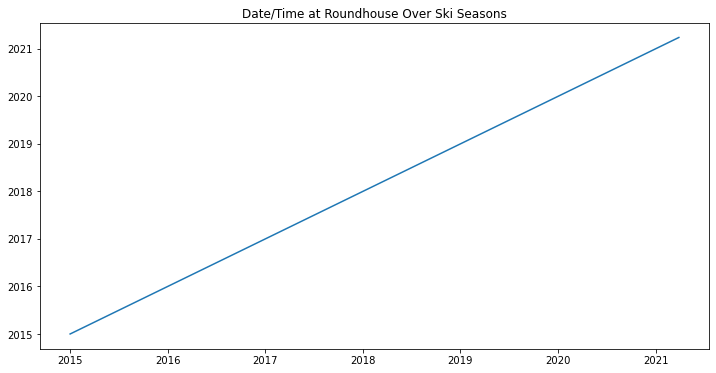

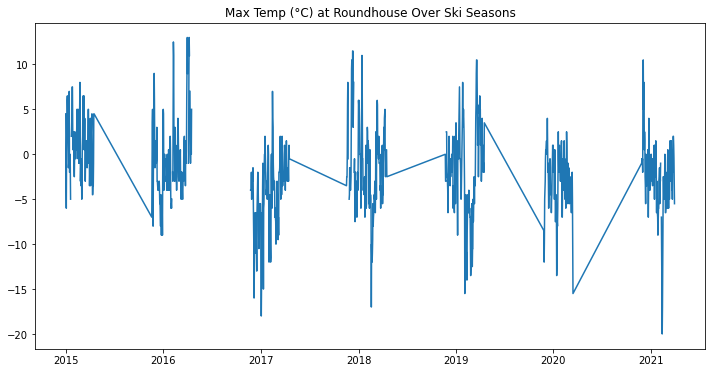

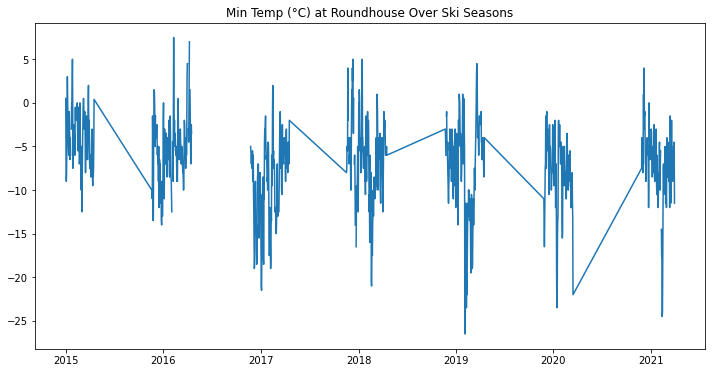

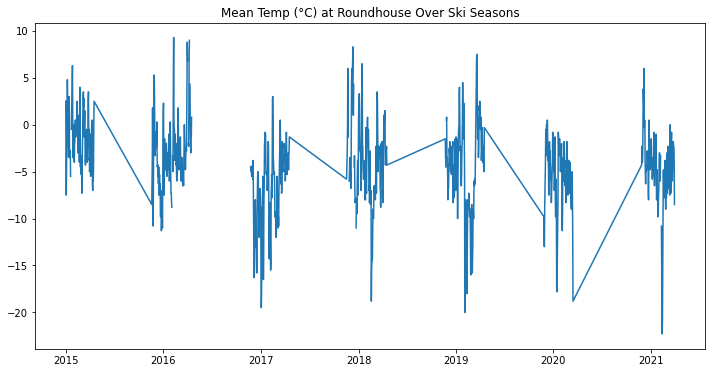

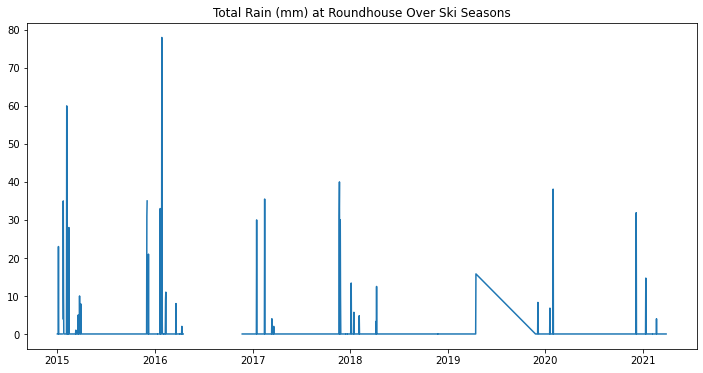

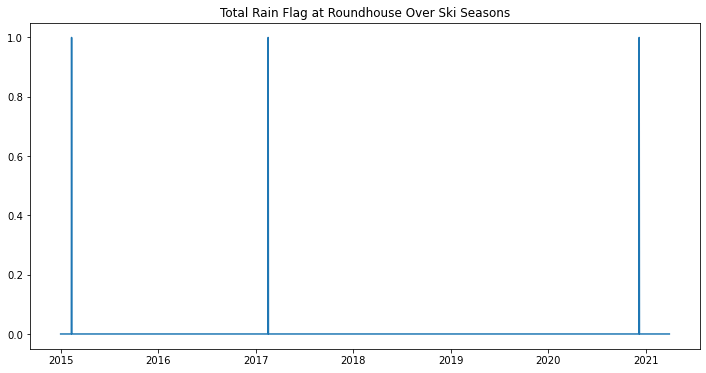

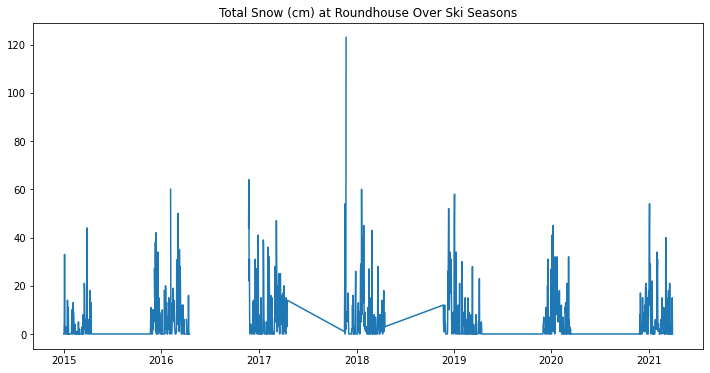

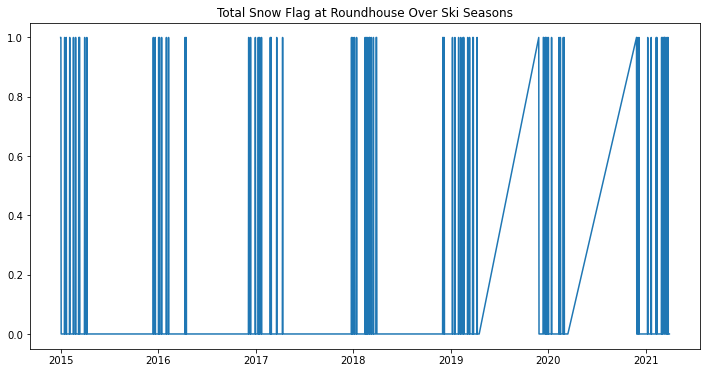

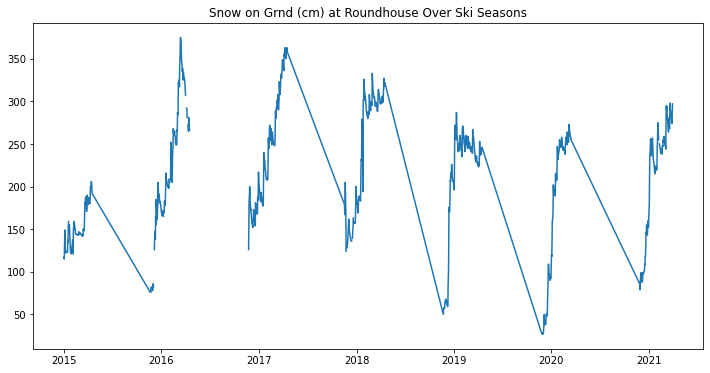

In [166]:
for col in rh_df.columns:
    # build figure
    plt.figure(figsize = (12,6))
    
    # plot data
    plt.plot(rh_df['Date/Time'],
             rh_df[col])
    
    # title
    plt.title(f"{col} at Roundhouse Over Ski Seasons")
    
    plt.show()

The plots above are to be expected.  There is a lot of variance with the data above.  Using the data we have, we could probably we reasonably successful in imputing the precipitation values using leading/lagging information.  Imputing the temperatures is going to be a little more tricky.  Let's explore what the difference between temperatures is day to day.  If it is relatively consistent, we could consider using a linear interpretation bewteen two values on either side of a null value.  Before we explore that any further, let's get a list of the reamining null values to ensure we don't have any multi-day black-outs in a our data.

In [167]:
# show all rows with any NaN values
rh_df[rh_df.isna().any(axis=1)]

,Date/Time,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Snow on Grnd (cm)
19,2015-01-20,NaN,NaN,NaN,NaN,0,NaN,0,NaN
20,2015-01-21,NaN,NaN,NaN,NaN,0,NaN,0,NaN
122,2015-12-04,NaN,NaN,NaN,NaN,0,NaN,0,NaN
123,2015-12-05,NaN,NaN,NaN,NaN,0,NaN,0,NaN
159,2016-01-10,NaN,NaN,NaN,NaN,0,NaN,0,NaN
160,2016-01-11,NaN,NaN,NaN,NaN,0,NaN,0,NaN
183,2016-02-03,NaN,NaN,NaN,NaN,0,NaN,0,NaN
184,2016-02-04,NaN,NaN,NaN,NaN,0,NaN,0,NaN
242,2016-04-02,NaN,NaN,NaN,NaN,0,NaN,0,NaN
243,2016-04-03,NaN,NaN,NaN,NaN,0,NaN,0,NaN


From the above, it looks like we have many two day black-outs, but nothing bigger than that.  We are comfortable imputing across that gap.  Let's come up with an imputation strategy for each column:
- For each of the temperature columns, a simple linear imputation between values on either side of the blackout period will have to suffice.
- For the rain, let's check to see how often we had any rainfall at all.  It is very possible we can simply impute this value as 0.
- For snow fall, let's look at the snow on ground before and after the blackout period.  If the base increased, we will assume that much snow fell equally aross the black out days.  Snow on ground will be updated accordingly, so effectively a linear imputation between the two values on either side.

It must be said that these are all pretty rough methods, and we may have to revist this later to try different approaches if we are getting very poor results from our model.

Let's work through these in order.

In [168]:
# get all the indicies of rows needing values imputed
indicies = list(rh_df[rh_df.isna().any(axis=1)].index)

indicies

[19,
 20,
 122,
 123,
 159,
 160,
 183,
 184,
 242,
 243,
 249,
 257,
 411,
 413,
 432,
 438,
 439,
 559,
 885,
 886]

In [169]:
# group all the indicies into arrays so we have any multi-day blackouts in their own list
blackout_periods = [[19,20],
                    [122,123],
                    [159,160],
                    [183,184],
                    [242,243],
                    [249],
                    [257],
                    [411],
                    [413],
                    [432],
                    [438, 439],
                    [559],
                    [885, 886]]

In [170]:
# impute all the temperatures

# loop through all the blackout periods
for period in blackout_periods:
    
    # get the max and min indicies in the period
    min_i = min(period)
    max_i = max(period)
    
    # push out one in each direction to get the indices we need to impute from
    min_i -= 1
    max_i += 1
    
    # get the length of the period
    len_period = len(period)
    
    # loop through all columns
    for col in rh_df.columns:
        
        # if the column contains the word Temp
        if col.find('Temp') != -1:
            
            # get the values to impute from and generate the step value
            difference_per_step = (rh_df.loc[max_i, col] - rh_df.loc[min_i, col])/(len_period + 1)
            
            for i in period:
                rh_df.loc[i, col] = rh_df.loc[i - 1, col] + difference_per_step
            

In [171]:
# spot checks to see that it worked!
for i in random.choices(indicies, k = 4):
    for idx in [i - 1, i, i + 1]:
        print(rh_df.iloc[idx, 1:4])
    print()

Max Temp (°C)    -1.833333
Min Temp (°C)    -5.833333
Mean Temp (°C)   -3.866667
Name: 159, dtype: object
Max Temp (°C)    -1.166667
Min Temp (°C)    -4.666667
Mean Temp (°C)   -2.933333
Name: 160, dtype: object
Max Temp (°C)    -0.5
Min Temp (°C)    -3.5
Mean Temp (°C)   -2.0
Name: 161, dtype: object

Max Temp (°C)     -5.0
Min Temp (°C)    -12.5
Mean Temp (°C)    -8.8
Name: 182, dtype: object
Max Temp (°C)         -4.0
Min Temp (°C)    -9.833333
Mean Temp (°C)   -6.966667
Name: 183, dtype: object
Max Temp (°C)         -3.0
Min Temp (°C)    -7.166667
Mean Temp (°C)   -5.133333
Name: 184, dtype: object

Max Temp (°C)    -3.0
Min Temp (°C)    -8.5
Mean Temp (°C)   -5.8
Name: 885, dtype: object
Max Temp (°C)     -5.0
Min Temp (°C)    -11.5
Mean Temp (°C)    -8.3
Name: 886, dtype: object
Max Temp (°C)     -7.0
Min Temp (°C)    -14.5
Mean Temp (°C)   -10.8
Name: 887, dtype: object

Max Temp (°C)    -2.5
Min Temp (°C)    -4.0
Mean Temp (°C)   -3.3
Name: 412, dtype: object
Max Temp (°C)    -

In [172]:
# check how many days total rain there were across all 6 seasons
rh_df[rh_df['Total Rain (mm)'] > 0].count()

Date/Time            49
Max Temp (°C)        49
Min Temp (°C)        49
Mean Temp (°C)       49
Total Rain (mm)      49
Total Rain Flag      49
Total Snow (cm)      49
Total Snow Flag      49
Snow on Grnd (cm)    49
dtype: int64

In [173]:
49/rh_df.shape[0]

0.052294557097118465

From the above we can see that 1 in every 20 days had rain over the ski season.  We only have 20 days with missing data, so that would make a maximum of one more day of rain.  That seems like one very small data point to have an issue with, so we won't worry about that and code all our days missing rain data as 0.

In [174]:
# loop through indicies with NaN
for i in indicies:
    
    # confirm this column has a NaN value
    if pd.isna(rh_df.loc[i, 'Total Rain (mm)']):
        
        # impute our value
        rh_df.loc[i, 'Total Rain (mm)'] = 0

# check it has worked
rh_df.loc[indicies, :]

,Date/Time,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Snow on Grnd (cm)
19,2015-01-20,-2.666667,-5.000000,-3.833333,0.0,0,NaN,0,NaN
20,2015-01-21,-0.333333,-4.000000,-2.166667,0.0,0,NaN,0,NaN
122,2015-12-04,-0.333333,-2.333333,-1.366667,0.0,0,NaN,0,NaN
123,2015-12-05,-0.666667,-3.166667,-1.933333,0.0,0,NaN,0,NaN
159,2016-01-10,-1.833333,-5.833333,-3.866667,0.0,0,NaN,0,NaN
160,2016-01-11,-1.166667,-4.666667,-2.933333,0.0,0,NaN,0,NaN
183,2016-02-03,-4.000000,-9.833333,-6.966667,0.0,0,NaN,0,NaN
184,2016-02-04,-3.000000,-7.166667,-5.133333,0.0,0,NaN,0,NaN
242,2016-04-02,5.666667,2.000000,3.866667,0.0,0,NaN,0,NaN
243,2016-04-03,2.333333,-0.500000,0.933333,0.0,0,NaN,0,NaN


That leaves us with snowfall and snow on the ground.  Snow on the ground will go linearly between the two points on either side of the the blackout period.  Total snow will require a little more finessing.  From casual observations, it looks like the total snow is not neccessarily the difference between two snow on ground measurements.  Let's try and get an idea of the ratio between the difference bewteen snow on the ground and total snow.

In [175]:
# get the columns we need in a throwaway df
diff_df = rh_df[['Total Snow (cm)', 'Snow on Grnd (cm)']]

# get the difference with the next row
diff_df['Snow on Grnd Diff'] = -1*diff_df['Snow on Grnd (cm)'].diff(periods = -1)

# show rows where the difference is positive only
diff_df[diff_df['Snow on Grnd Diff'] >= 0]

/tmp/ipykernel_2705/4150036311.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_df['Snow on Grnd Diff'] = -1*diff_df['Snow on Grnd (cm)'].diff(periods = -1)


,Total Snow (cm),Snow on Grnd (cm),Snow on Grnd Diff
2,5.0,115.0,17.0
3,33.0,132.0,17.0
6,0.0,123.0,-0.0
8,3.0,122.0,2.0
9,2.0,124.0,-0.0
...,...,...,...
925,21.0,268.0,16.0
926,21.0,284.0,14.0
930,4.0,284.0,1.0
934,14.0,274.0,13.0


In [176]:
# get a look at the statistics for each column
diff_df[diff_df['Snow on Grnd Diff'] >=0].describe()

,Total Snow (cm),Snow on Grnd (cm),Snow on Grnd Diff
count,416.000000,416.000000,416.000000
mean,12.622596,198.293269,7.766827
std,12.407589,78.168342,10.085942
min,0.000000,27.000000,-0.000000
25%,3.000000,144.000000,1.000000
50%,9.000000,199.500000,5.000000
75%,18.000000,250.000000,10.000000
max,64.000000,364.000000,101.000000


As an approximation, it looks like the Total Snow value is roughly 9/5 times greater than the Snow on Grn Difference.  The standard deviation is quite large, but as this is only affecting a few records we will use this to approximate the Total Snow.  We will revisit later if having issues with our model.  Let's go ahead and impute both Snow on Grnd and Total Snow.

In [177]:
# impute all the Snow on Ground and total Snow

# loop through all the blackout periods
for period in blackout_periods:
    
    # get the max and min indicies in the period
    min_i = min(period)
    max_i = max(period)
    
    # push out one in each direction to get the indices we need to impute from
    min_i -= 1
    max_i += 1
    
    # get the length of the period
    len_period = len(period)
    
    # set column name
    col = 'Snow on Grnd (cm)'
    
    # get the values to impute from and generate the step value
    difference_per_step = (rh_df.loc[max_i, col] - rh_df.loc[min_i, col])/(len_period + 1)

    for i in period:
        
        # confim the snow on ground value is NaN
        if pd.isna(rh_df.loc[i, col]):
            
            # calcualte the value of snow on ground to impute and impute it
            snow_on_ground_val = rh_df.loc[i - 1, col] + difference_per_step
            rh_df.loc[i, col] = snow_on_ground_val
        
        # check to see if the Total Snow value is NaN
        if pd.isna(rh_df.loc[i, 'Total Snow (cm)']):
            
            # if the differnce is positive, impute value, factored by 9/5
            if difference_per_step > 0:
                rh_df.loc[i, 'Total Snow (cm)'] = difference_per_step*(9/5)
            
            # otherwise, impute 0
            else:
                rh_df.loc[i, 'Total Snow (cm)'] = 0

In [178]:
# check it has worked
rh_df.loc[indicies, :]

,Date/Time,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Snow on Grnd (cm)
19,2015-01-20,-2.666667,-5.000000,-3.833333,0.0,0,0.0,0,157.666667
20,2015-01-21,-0.333333,-4.000000,-2.166667,0.0,0,0.0,0,156.333333
122,2015-12-04,-0.333333,-2.333333,-1.366667,0.0,0,26.4,0,96.666667
123,2015-12-05,-0.666667,-3.166667,-1.933333,0.0,0,26.4,0,111.333333
159,2016-01-10,-1.833333,-5.833333,-3.866667,0.0,0,2.4,0,166.333333
160,2016-01-11,-1.166667,-4.666667,-2.933333,0.0,0,2.4,0,167.666667
183,2016-02-03,-4.000000,-9.833333,-6.966667,0.0,0,1.8,0,206.000000
184,2016-02-04,-3.000000,-7.166667,-5.133333,0.0,0,1.8,0,207.000000
242,2016-04-02,5.666667,2.000000,3.866667,0.0,0,0.0,0,302.000000
243,2016-04-03,2.333333,-0.500000,0.933333,0.0,0,0.0,0,297.000000


In [179]:
# final check to make sure we have cleared all NaN values
rh_df.isna().sum().sum()

0

We have successfully imputed and cleaned all of the data from the Roundhouse weather station.  We may need to return and rea-approach some of our imputation if we have no success with our modelling, but we will leave that for later.

The last thing to do now is to save the data frame to a csv file.

In [180]:
rh_df.to_csv('./Data/RoundHouseClean.csv',
             index = False)

### Return During Modelling Part II
Date: 2021.12.01

During our feature engineering and model interation, we realized that we wanted to engineer the snowpack at the 2,000m on the mountain.  In order to do that, we are going to need to pull the records from the first snowfall through the day the moutain opened.  We are going to reload the data from the start and repeat many of the steps above to produce a 'pre-ski-season' data set that we will export for use in our Feature Engineering and Modelling Part II notebook.

In [3]:
# get first data frame
rh_df1 = pd.read_csv('./Data/RoundhouseWeatherData/en_climate_daily_BC_1108906_2015_P1D.csv')

# build list of years we have data for
years = ['2016', '2017', '2018', '2019', '2020', '2021']

# loop through years
for year in years:
    
    # read in current years csv
    curr_df = pd.read_csv(f"./Data/RoundhouseWeatherData/en_climate_daily_BC_1108906_{year}_P1D.csv")
    
    # concat onto data frame
    rh_df1 = pd.concat([rh_df1, curr_df])

In [4]:
# move ahead
rh_df1['Date/Time'] = pd.to_datetime(rh_df1['Date/Time'],
                                    infer_datetime_format = True)

In [6]:
# list to store tuples of (pre-season, opening day)
open_close = []

# add all open close dates except 2015 season as we missed opening day that year
open_close.append((datetime.datetime(2015, 9, 1), datetime.datetime(2015, 11, 19, 23, 59, 59)))
open_close.append((datetime.datetime(2016, 9, 1), datetime.datetime(2016, 11, 23, 23, 59, 59)))
open_close.append((datetime.datetime(2017, 9, 1), datetime.datetime(2017, 11, 17, 23, 59, 59)))
open_close.append((datetime.datetime(2018, 9, 1), datetime.datetime(2018, 11, 22, 23, 59, 59)))
open_close.append((datetime.datetime(2019, 9, 1), datetime.datetime(2019, 11, 26, 23, 59, 59)))
open_close.append((datetime.datetime(2020, 9, 1), datetime.datetime(2020, 11, 26, 23, 59, 59)))

In [9]:
# filter for ski seasons only -first check
rh_df1[rh_df1['Date/Time'].apply(season_limit, args = (open_close,)) == True]['Date/Time'].describe()

/tmp/ipykernel_3031/1812119173.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  rh_df1[rh_df1['Date/Time'].apply(season_limit, args = (open_close,)) == True]['Date/Time'].describe()


count                     499
unique                    499
top       2015-09-01 00:00:00
freq                        1
first     2015-09-01 00:00:00
last      2020-11-26 00:00:00
Name: Date/Time, dtype: object

In [10]:
# filter for ski seasons only
rh_df1 = rh_df1[rh_df1['Date/Time'].apply(season_limit, args = (open_close,)) == True]

In [11]:
# station id columns to drop
cols_to_drop = ['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID']

# loop through columns in df
for col in rh_df1.columns:
    
    # calculate number of non-nulls in column
    non_nulls = rh_df1.shape[0] - rh_df1[col].isna().sum()
    
    # if we have one or less
    if non_nulls <= 1:
        
        # add it to columns to drop
        cols_to_drop.append(col)

# drop all columns
rh_df1 = rh_df1.drop(columns = cols_to_drop)

# check if worked
display([col for col in cols_to_drop if col in rh_df1.columns])

[]

In [12]:
# renumber our index inplace, don't keep the old one
rh_df1.reset_index(drop = True,
                  inplace = True)

In [13]:
# drop columns
rh_df1.drop(columns = ['Year', 'Month', 'Day'], inplace = True)

In [14]:
# get columns to drop
cols_to_drop = [rh_df1.columns[5],
                rh_df1.columns[6],
                rh_df1.columns[11]]

# confrim we have the column names we want
cols_to_drop

['Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Precip (mm)']

In [15]:
# drop columns
rh_df1 = rh_df1.drop(columns = cols_to_drop)

In [16]:
# drop columns
rh_df1 = rh_df1.drop(columns = ['Data Quality', 'Total Precip Flag'])

In [17]:
# print out columns to check we have what we want
rh_df1.columns

Index(['Date/Time', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
       'Total Rain (mm)', 'Total Rain Flag', 'Total Snow (cm)',
       'Total Snow Flag', 'Snow on Grnd (cm)'],
      dtype='object')

The above covers the column manipulation we need to do.  Next, let's get a look at the data, to see if there is any work to do with missing values.

In [19]:
rh_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date/Time          499 non-null    datetime64[ns]
 1   Max Temp (°C)      129 non-null    float64       
 2   Min Temp (°C)      129 non-null    float64       
 3   Mean Temp (°C)     129 non-null    float64       
 4   Total Rain (mm)    129 non-null    float64       
 5   Total Rain Flag    3 non-null      object        
 6   Total Snow (cm)    129 non-null    float64       
 7   Total Snow Flag    10 non-null     object        
 8   Snow on Grnd (cm)  128 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 35.2+ KB


It looks like there are a lot of null values in our critical columns, but thankfully, the same number of nulls.  Let's take a look at the first preseason to see what is going on.

In [21]:
# remove limit on number of rows we are allowed to look at
pd.set_option('display.max_rows', None)

# show first preseason (roughly)
rh_df1.head(90)

,Date/Time,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Snow on Grnd (cm)
0,2015-09-01,4.2,1.5,2.9,11.2,NaN,0.0,NaN,0.0
1,2015-09-02,3.6,-1.0,1.3,1.5,NaN,0.0,T,0.0
2,2015-09-03,2.7,-1.5,0.6,3.3,NaN,0.0,T,0.0
3,2015-09-04,6.9,-1.5,2.7,0.0,NaN,0.0,NaN,0.0
4,2015-09-05,8.1,0.0,4.1,0.0,NaN,0.0,NaN,0.0
5,2015-09-06,6.6,0.0,3.3,0.0,NaN,0.0,NaN,0.0
6,2015-09-07,7.0,1.5,4.3,5.6,NaN,0.0,NaN,0.0
7,2015-09-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2015-09-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2015-09-10,18.5,5.0,11.8,0.0,NaN,0.0,NaN,0.0


From visual inspection of the above we can see for the start of the 2015/2016 season there was virtaully no information reported from late September through to the 16th of November.  Because our start date for that season was the 19th of November, we will not get the additional information we need.

This is quite dissappointing.  We cannot interpolate the snow pack at 2,000m for some years and not others.  We are going to have to adjust our approach.  We know that the two years with snow packs that are way outside the expected are the 2018/2019 season start and the 2020/2021 season start.  Let's see if there is pre-season data available for these years.  If there is, we can interpolate for those years only, use those values, plus the 1,640m snowpack in other years to infer a minimum snowpack requirement.  We would then binarize the snowpack column based on that minimum value to be 'snowpack good - yes/no'.  Let's hope we have data for the 2018 and 2020 pre-season. 

In [26]:
# looking at 2018 pre season
rh_df1[rh_df1['Date/Time'].apply(lambda d: d.year) == 2018]

,Date/Time,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Snow on Grnd (cm)
242,2018-09-01,8.0,3.5,5.8,0.0,NaN,0.0,NaN,0.0
243,2018-09-02,10.0,4.0,7.0,0.8,NaN,0.0,NaN,0.0
244,2018-09-03,9.0,3.0,6.0,0.0,NaN,0.0,NaN,0.0
245,2018-09-04,12.5,3.5,8.0,0.0,NaN,0.0,NaN,0.0
246,2018-09-05,15.5,7.0,11.3,0.0,NaN,0.0,NaN,0.0
247,2018-09-06,17.5,11.5,14.5,2.1,NaN,0.0,NaN,0.0
248,2018-09-07,9.0,4.5,6.8,5.5,NaN,0.0,NaN,0.0
249,2018-09-08,7.0,5.0,6.0,3.7,NaN,0.0,NaN,0.0
250,2018-09-09,4.0,3.0,3.5,17.1,NaN,0.0,NaN,0.0
251,2018-09-10,5.0,2.5,3.8,2.4,NaN,0.0,NaN,0.0


In [27]:
# looking at 2020 pre season
rh_df1[rh_df1['Date/Time'].apply(lambda d: d.year) == 2020]

,Date/Time,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Snow on Grnd (cm)
412,2020-09-01,15.0,8.5,11.8,0.0,NaN,0.0,NaN,0.0
413,2020-09-02,14.0,9.0,11.5,0.0,NaN,0.0,NaN,0.0
414,2020-09-03,18.0,9.5,13.8,0.0,NaN,0.0,NaN,0.0
415,2020-09-04,20.0,13.0,16.5,0.0,T,0.0,NaN,0.0
416,2020-09-05,18.0,11.5,14.8,0.0,NaN,0.0,NaN,0.0
417,2020-09-06,18.5,12.0,15.3,0.0,NaN,0.0,NaN,0.0
418,2020-09-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
419,2020-09-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,2020-09-09,22.5,12.5,17.5,0.0,NaN,0.0,NaN,0.0
421,2020-09-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Unfortunately, from visual inspection of the above, we have the same issue with our years of interest.  There is no data from at least one month prior to our opening days, so we can do no interpolation of snowpack.  We did considering pulling information from the weather station at the base of Whistler and using that to interpolate snow pack, but early season weather can involve a lot of rain days at all elevations.  These conditions reduce the snow pack.  When we were interpolating from 1,640m up, we could see how that rain was reducing the snow pack, and when it was raining everywhere on the mountain, we could assume equal reduction of snow pack.  Because we don't have that data, we feel our interpolated numbers will become too out of sync with what the actuals were on the ground to be of any use.  This brings a halt to this line of inquirey

### Conclusion

We have successfully taken the raw data downloaded from Environment and Climate Change Canada and prepared it for our work in predicting if the Peak chair will open.  Specifically we:
- limited dates to our ski seasons
- removed un-needed columns
- imputed missing data

We also attempted to utilize pre-season data, but the data from the pre-season is explicitly missing in the precise window we need.

That concludes this notebook.  For the next step in the project, please see ...